In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.ndimage.filters import gaussian_filter

In [3]:
# Import ocean data

datapath = '/Volumes/Macintosh HD/Users/pmartin2/Personal OLD_MacBook/Documents/School/Michigan/Research/QGCM_codes/'

#---------------------------------------------------------
# 20 YEAR OCEAN

KE1_oc = np.load(datapath + 'KE1_040_059_16Jan2018.npy')
KE2_oc = np.load(datapath + 'KE2_040_059_16Jan2018.npy')
KE3_oc = np.load(datapath + 'KE3_040_059_16Jan2018.npy')

PE1_oc = np.load(datapath + 'PE1_040_059_16Jan2018.npy')
PE2_oc = np.load(datapath + 'PE2_040_059_16Jan2018.npy')

windstress_oc = np.load(datapath + 'windstress_040_059_16Jan2018.npy')
buoyancy_oc = np.load(datapath + 'buoyancy_040_059_16Jan2018.npy')
bottomDrag_oc = np.load(datapath + 'bottomDrag_040_059_16Jan2018.npy')

#---------------------------------------------------------

## Plot Ocean 20 Year with smoothing, not area preserving

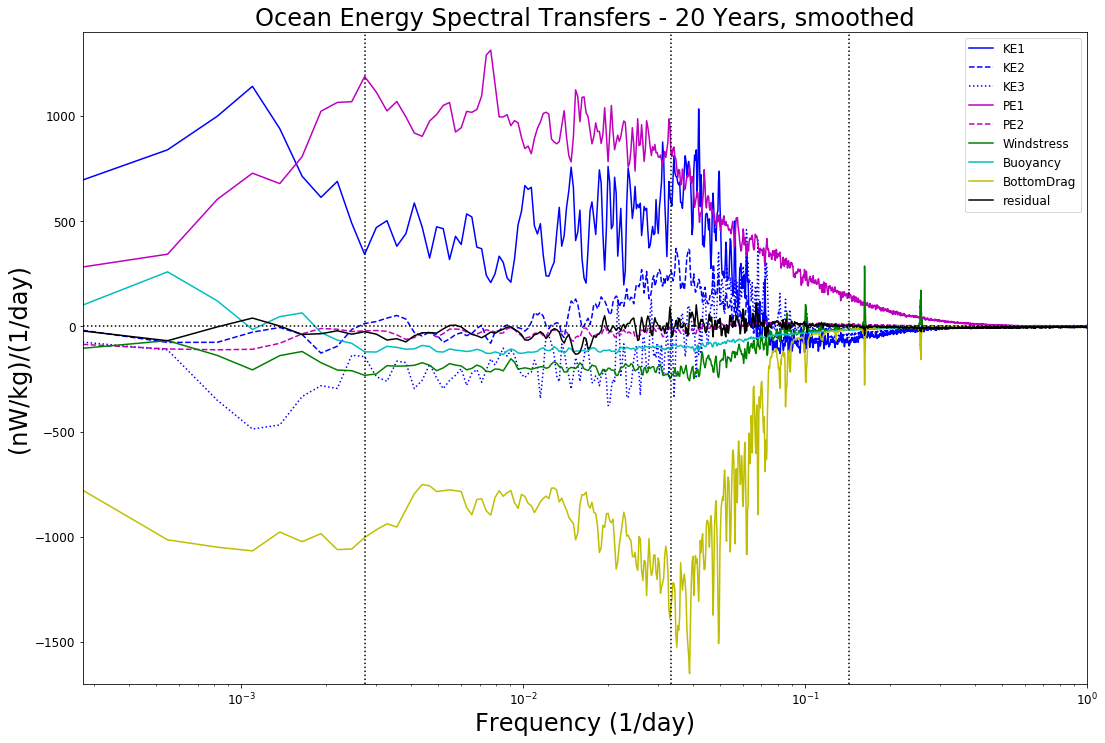

In [19]:
# For gaussian filter
n = 0.8

ktiso = (2./(365*20))*np.arange(0,np.floor(20*365.0/2)+1)
residual = KE1_oc + KE2_oc + KE3_oc - PE1_oc - PE2_oc - windstress_oc - buoyancy_oc - bottomDrag_oc

# Specify smaller font size for screen viewing
font = {'size'   : 12}
matplotlib.rc('font', **font)

plt.figure(figsize=(18,12))
plt.semilogx(ktiso,gaussian_filter(-KE1_oc*1e9,sigma=n),color='b',label='KE1')
plt.semilogx(ktiso,gaussian_filter(-KE2_oc*1e9,sigma=n),color='b',LineStyle='dashed',label='KE2')
plt.semilogx(ktiso,gaussian_filter(-KE3_oc*1e9,sigma=n),color='b',LineStyle='dotted',label='KE3')
plt.semilogx(ktiso,gaussian_filter(PE1_oc*1e9,sigma=n),color='m',label='PE1')
plt.semilogx(ktiso,gaussian_filter(PE2_oc*1e9,sigma=n),color='m',LineStyle='dashed',label='PE2')
plt.semilogx(ktiso,gaussian_filter(windstress_oc*1e9,sigma=n),color='g',label='Windstress')
plt.semilogx(ktiso,gaussian_filter(buoyancy_oc*1e9,sigma=n),color='c',label='Buoyancy')
plt.semilogx(ktiso,gaussian_filter(bottomDrag_oc*1e9,sigma=n),color='y',label='BottomDrag')

plt.semilogx(ktiso,gaussian_filter(residual*1e9,sigma=n),color='k',label='residual')

plt.axhline(0,color='k',linestyle='dotted')
plt.axvline((1./7),color='k',linestyle='dotted')
plt.axvline((1./30),color='k',linestyle='dotted')
plt.axvline((1./(365)),color='k',linestyle='dotted')

plt.xlim((np.min(ktiso),np.max(ktiso)))
plt.ylim((-1700,1400))
plt.xlabel('Frequency (1/day)',FontSize=24)
plt.ylabel('(nW/kg)/(1/day)',FontSize=24)
plt.title('Ocean Energy Spectral Transfers - 20 Years, smoothed',FontSize='24')
#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.legend()

plt.savefig('Tbudget_oc_20yr_040_059_OSM2018.png')

## Plot Ocean 20 Year without ktiso

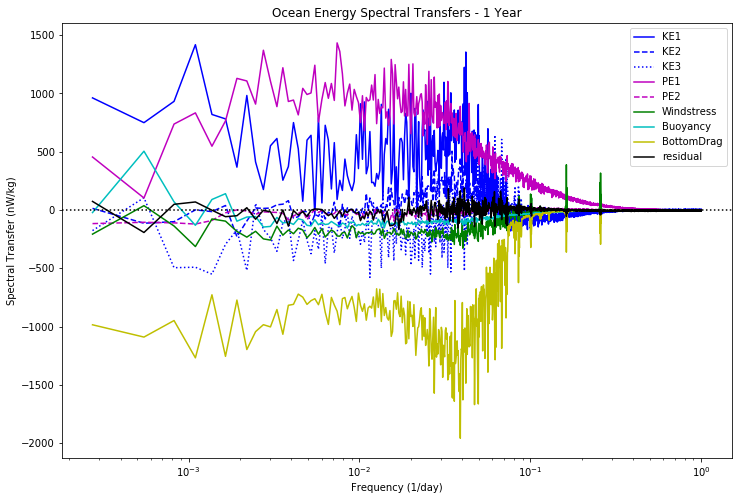

In [4]:
ktiso = (2./(365*20))*np.arange(0,np.floor(20*365.0/2)+1)
residual = KE1_oc + KE2_oc + KE3_oc - PE1_oc - PE2_oc - windstress_oc - buoyancy_oc - bottomDrag_oc

plt.figure(figsize=(12,8))
plt.semilogx(ktiso,-KE1_oc*1e9,color='b',label='KE1')
plt.semilogx(ktiso,-KE2_oc*1e9,color='b',LineStyle='dashed',label='KE2')
plt.semilogx(ktiso,-KE3_oc*1e9,color='b',LineStyle='dotted',label='KE3')
plt.semilogx(ktiso,PE1_oc*1e9,color='m',label='PE1')
plt.semilogx(ktiso,PE2_oc*1e9,color='m',LineStyle='dashed',label='PE2')
plt.semilogx(ktiso,windstress_oc*1e9,color='g',label='Windstress')
plt.semilogx(ktiso,buoyancy_oc*1e9,color='c',label='Buoyancy')
plt.semilogx(ktiso,bottomDrag_oc*1e9,color='y',label='BottomDrag')

plt.semilogx(ktiso,residual*1e9,color='k',label='residual')

plt.axhline(0,color='k',linestyle='dotted')
plt.legend()
plt.xlabel('Frequency (1/day)')
plt.ylabel('Spectral Transfer (nW/kg)')
plt.title('Ocean Energy Spectral Transfers - 1 Year')

## Plot Ocean 20 Year with ktiso

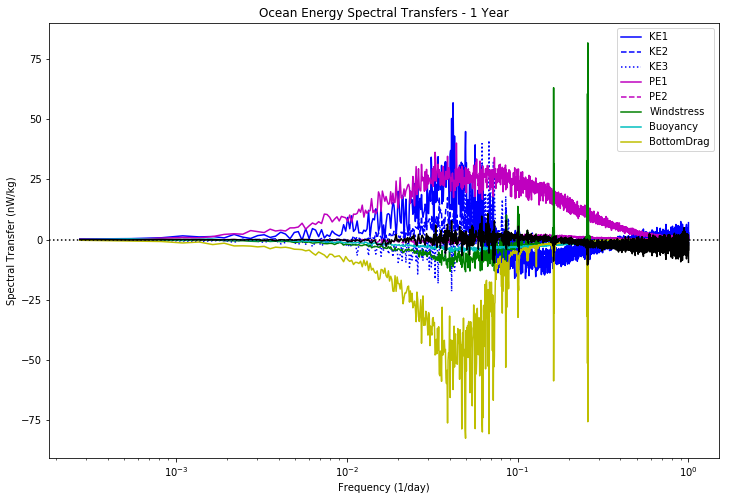

In [7]:
ktiso = (2./(365*20))*np.arange(0,np.floor(20*365.0/2)+1)
residual = KE1_oc + KE2_oc + KE3_oc - PE1_oc - PE2_oc - windstress_oc - buoyancy_oc - bottomDrag_oc

plt.figure(figsize=(12,8))
plt.semilogx(ktiso,-KE1_oc*ktiso*1e9,color='b',label='KE1')
plt.semilogx(ktiso,-KE2_oc*ktiso*1e9,color='b',LineStyle='dashed',label='KE2')
plt.semilogx(ktiso,-KE3_oc*ktiso*1e9,color='b',LineStyle='dotted',label='KE3')
plt.semilogx(ktiso,PE1_oc*ktiso*1e9,color='m',label='PE1')
plt.semilogx(ktiso,PE2_oc*ktiso*1e9,color='m',LineStyle='dashed',label='PE2')
plt.semilogx(ktiso,windstress_oc*ktiso*1e9,color='g',label='Windstress')
plt.semilogx(ktiso,buoyancy_oc*ktiso*1e9,color='c',label='Buoyancy')
plt.semilogx(ktiso,bottomDrag_oc*ktiso*1e9,color='y',label='BottomDrag')

plt.semilogx(ktiso,residual*ktiso*1e9,color='k')

plt.axhline(0,color='k',linestyle='dotted')
plt.legend()
plt.xlabel('Frequency (1/day)')
plt.ylabel('Spectral Transfer (nW/kg)')
plt.title('Ocean Energy Spectral Transfers - 1 Year')

# Import atmosphere data

In [4]:
# Import atm data

datapath = '/Volumes/Macintosh HD/Users/pmartin2/Personal OLD_MacBook/Documents/School/Michigan/Research/QGCM_codes/'

#---------------------------------------------------------
# 20 YEAR OCEAN

KE1_at = np.load(datapath + 'KE1_atm_sum_040_059_16Jan2018.npy')
KE2_at = np.load(datapath + 'KE2_atm_sum_040_059_16Jan2018.npy')
KE3_at = np.load(datapath + 'KE3_atm_sum_040_059_16Jan2018.npy')

PE1_at = np.load(datapath + 'PE1_atm_sum_040_059_16Jan2018.npy')
PE2_at = np.load(datapath + 'PE2_atm_sum_040_059_16Jan2018.npy')

windstress_at = np.load(datapath + 'windstress_atm_sum_040_059_16Jan2018.npy')
buoyancy_at = np.load(datapath + 'buoyancy_atm_sum_040_059_16Jan2018.npy')
#---------------------------------------------------------

## Plot atmosphere with smoothing, not area preserving

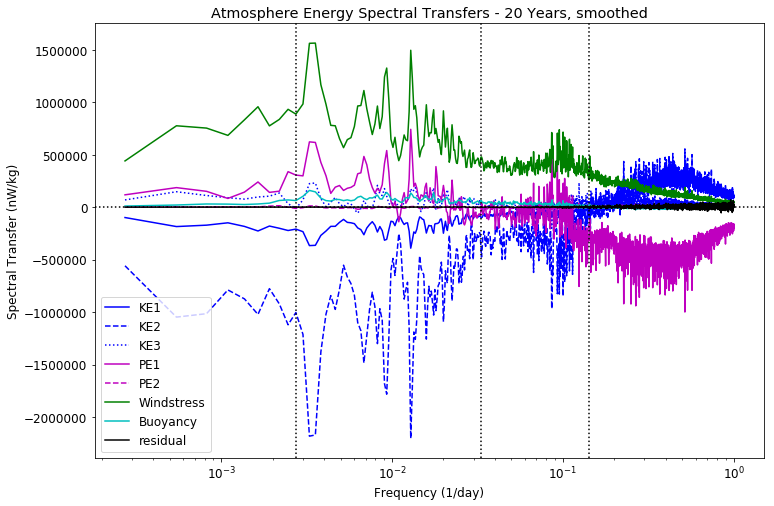

In [22]:
# Sigma for gaussian filter
m = 0.8

ktiso = (2./(365*20))*np.arange(0,np.floor(20*365.0/2)+1)
residual_at = - KE1_at - KE2_at - KE3_at - PE1_at - PE2_at - windstress_at - buoyancy_at

plt.figure(figsize=(12,8))
plt.semilogx(ktiso,gaussian_filter(KE1_at*1e9,sigma=m),color='b',label='KE1')
plt.semilogx(ktiso,gaussian_filter(KE2_at*1e9,sigma=m),color='b',LineStyle='dashed',label='KE2')
plt.semilogx(ktiso,gaussian_filter(KE3_at*1e9,sigma=m),color='b',LineStyle='dotted',label='KE3')
plt.semilogx(ktiso,gaussian_filter(PE1_at*1e9,sigma=m),color='m',label='PE1')
plt.semilogx(ktiso,gaussian_filter(PE2_at*1e9,sigma=m),color='m',LineStyle='dashed',label='PE2')
plt.semilogx(ktiso,gaussian_filter(windstress_at*1e9,sigma=m),color='g',label='Windstress')
plt.semilogx(ktiso,gaussian_filter(buoyancy_at*1e9,sigma=m),color='c',label='Buoyancy')

plt.semilogx(ktiso,gaussian_filter(residual_at*ktiso*1e9,sigma=m),color='k',label='residual')

plt.axhline(0,color='k',linestyle='dotted')
plt.axvline((1./7),color='k',linestyle='dotted')
plt.axvline((1./30),color='k',linestyle='dotted')
plt.axvline((1./(365)),color='k',linestyle='dotted')

plt.legend()
plt.xlabel('Frequency (1/day)')
plt.ylabel('Spectral Transfer (nW/kg)')
plt.title('Atmosphere Energy Spectral Transfers - 20 Years, smoothed')

## Plot atmosphere without smoothing, not area preserving

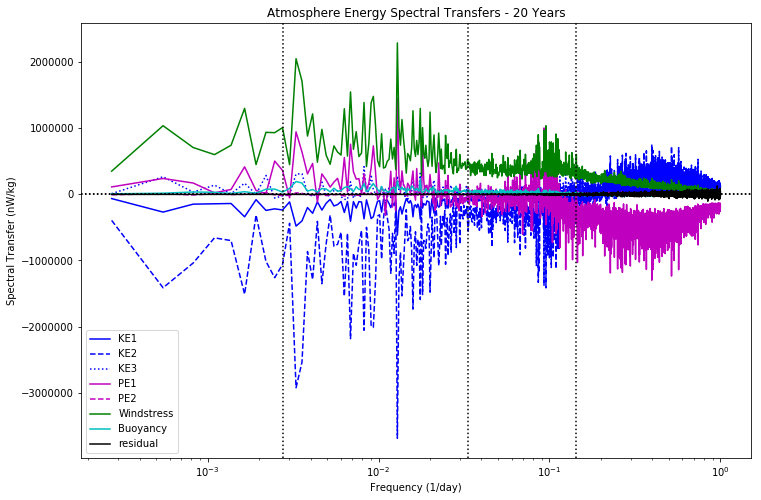

In [5]:
ktiso = (2./(365*20))*np.arange(0,np.floor(20*365.0/2)+1)
residual_at = - KE1_at - KE2_at - KE3_at - PE1_at - PE2_at - windstress_at - buoyancy_at

plt.figure(figsize=(12,8))
plt.semilogx(ktiso,KE1_at*1e9,color='b',label='KE1')
plt.semilogx(ktiso,KE2_at*1e9,color='b',LineStyle='dashed',label='KE2')
plt.semilogx(ktiso,KE3_at*1e9,color='b',LineStyle='dotted',label='KE3')
plt.semilogx(ktiso,PE1_at*1e9,color='m',label='PE1')
plt.semilogx(ktiso,PE2_at*1e9,color='m',LineStyle='dashed',label='PE2')
plt.semilogx(ktiso,windstress_at*1e9,color='g',label='Windstress')
plt.semilogx(ktiso,buoyancy_at*1e9,color='c',label='Buoyancy')

plt.semilogx(ktiso,residual_at*ktiso*1e9,color='k',label='residual')

plt.axhline(0,color='k',linestyle='dotted')
plt.axvline((1./7),color='k',linestyle='dotted')
plt.axvline((1./30),color='k',linestyle='dotted')
plt.axvline((1./(365)),color='k',linestyle='dotted')

plt.axhline(0,color='k',linestyle='dotted')
plt.legend()
plt.xlabel('Frequency (1/day)')
plt.ylabel('Spectral Transfer (nW/kg)')
plt.title('Atmosphere Energy Spectral Transfers - 20 Years')

## Plot atmosphere 20 years, area preserving

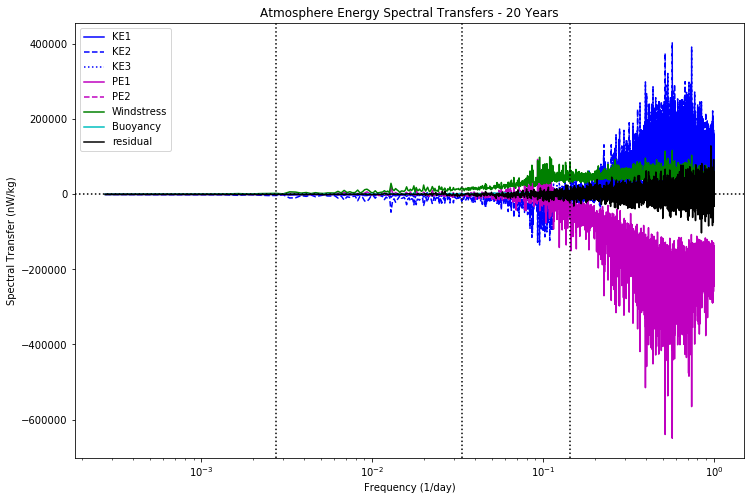

In [7]:
ktiso = (2./(365*20))*np.arange(0,np.floor(20*365.0/2)+1)
residual_at = - KE1_at - KE2_at - KE3_at - PE1_at - PE2_at - windstress_at - buoyancy_at

plt.figure(figsize=(12,8))
plt.semilogx(ktiso,KE1_at*ktiso*1e9,color='b',label='KE1')
plt.semilogx(ktiso,KE2_at*ktiso*1e9,color='b',LineStyle='dashed',label='KE2')
plt.semilogx(ktiso,KE3_at*ktiso*1e9,color='b',LineStyle='dotted',label='KE3')
plt.semilogx(ktiso,PE1_at*ktiso*1e9,color='m',label='PE1')
plt.semilogx(ktiso,PE2_at*ktiso*1e9,color='m',LineStyle='dashed',label='PE2')
plt.semilogx(ktiso,windstress_at*ktiso*1e9,color='g',label='Windstress')
plt.semilogx(ktiso,buoyancy_at*ktiso*1e9,color='c',label='Buoyancy')

plt.semilogx(ktiso,residual_at*ktiso*1e9,color='k',label='residual')

plt.axvline((1./7),color='k',linestyle='dotted')
plt.axvline((1./30),color='k',linestyle='dotted')
plt.axvline((1./(365)),color='k',linestyle='dotted')

plt.axhline(0,color='k',linestyle='dotted')
plt.legend()
plt.xlabel('Frequency (1/day)')
plt.ylabel('Spectral Transfer (nW/kg)')
plt.title('Atmosphere Energy Spectral Transfers - 20 Years, area preserving')

# Import atmosphere data ycexp

In [9]:
# Import atm data

datapath = '/Volumes/Macintosh HD/Users/pmartin2/Personal OLD_MacBook/Documents/School/Michigan/Research/QGCM_codes/'

#---------------------------------------------------------
# 20 YEAR OCEAN

KE1_at_ycexp = np.load(datapath + 'KE1_atm_ycexp_020_039_16Jan2018.npy')
KE2_at_ycexp = np.load(datapath + 'KE2_atm_ycexp_020_039_16Jan2018.npy')
KE3_at_ycexp = np.load(datapath + 'KE3_atm_ycexp_020_039_16Jan2018.npy')

PE1_at_ycexp = np.load(datapath + 'PE1_atm_ycexp_020_039_16Jan2018.npy')
PE2_at_ycexp = np.load(datapath + 'PE2_atm_ycexp_020_039_16Jan2018.npy')

windstress_at_ycexp = np.load(datapath + 'windstress_atm_ycexp_020_039_16Jan2018.npy')
buoyancy_at_ycexp = np.load(datapath + 'buoyancy_atm_ycexp_020_039_16Jan2018.npy')
#---------------------------------------------------------

## Plot atmosphere ycexp, smoothed data, not area preserving

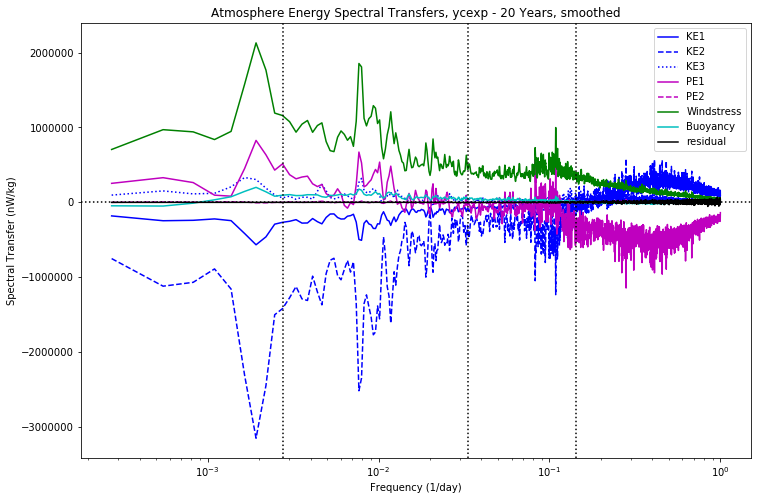

In [12]:
# Sigma for gaussian filter
m = 0.8

ktiso = (2./(365*20))*np.arange(0,np.floor(20*365.0/2)+1)

plt.figure(figsize=(12,8))
plt.semilogx(ktiso,gaussian_filter(KE1_at_ycexp*1e9,sigma=m),color='b',label='KE1')
plt.semilogx(ktiso,gaussian_filter(KE2_at_ycexp*1e9,sigma=m),color='b',LineStyle='dashed',label='KE2')
plt.semilogx(ktiso,gaussian_filter(KE3_at_ycexp*1e9,sigma=m),color='b',LineStyle='dotted',label='KE3')
plt.semilogx(ktiso,gaussian_filter(PE1_at_ycexp*1e9,sigma=m),color='m',label='PE1')
plt.semilogx(ktiso,gaussian_filter(PE2_at_ycexp*1e9,sigma=m),color='m',LineStyle='dashed',label='PE2')
plt.semilogx(ktiso,gaussian_filter(windstress_at_ycexp*1e9,sigma=m),color='g',label='Windstress')
plt.semilogx(ktiso,gaussian_filter(buoyancy_at_ycexp*1e9,sigma=m),color='c',label='Buoyancy')

plt.semilogx(ktiso,gaussian_filter(residual_at*ktiso*1e9,sigma=m),color='k',label='residual')

plt.axvline((1./7),color='k',linestyle='dotted')
plt.axvline((1./30),color='k',linestyle='dotted')
plt.axvline((1./(365)),color='k',linestyle='dotted')

plt.axhline(0,color='k',linestyle='dotted')
plt.legend()
plt.xlabel('Frequency (1/day)')
plt.ylabel('Spectral Transfer (nW/kg)')
plt.title('Atmosphere Energy Spectral Transfers, ycexp - 20 Years, smoothed')

## Plot atmosphere ycexp without ktiso

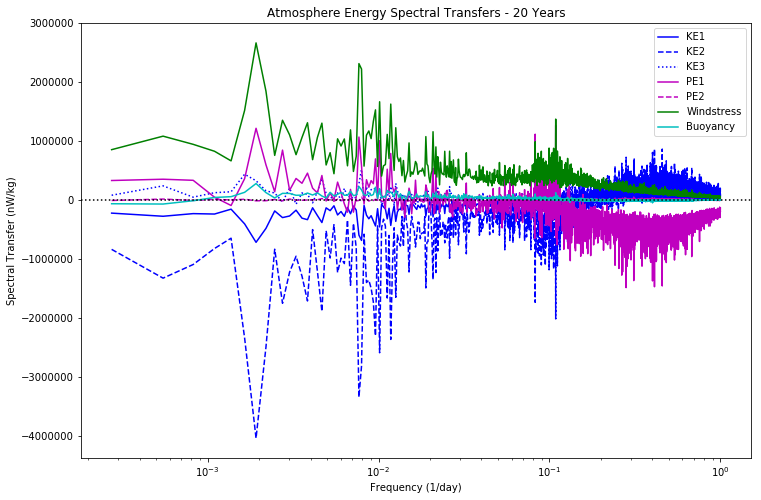

In [35]:
ktiso = (2./(365*20))*np.arange(0,np.floor(20*365.0/2)+1)

plt.figure(figsize=(12,8))
plt.semilogx(ktiso,KE1_at_ycexp*1e9,color='b',label='KE1')
plt.semilogx(ktiso,KE2_at_ycexp*1e9,color='b',LineStyle='dashed',label='KE2')
plt.semilogx(ktiso,KE3_at_ycexp*1e9,color='b',LineStyle='dotted',label='KE3')
plt.semilogx(ktiso,PE1_at_ycexp*1e9,color='m',label='PE1')
plt.semilogx(ktiso,PE2_at_ycexp*1e9,color='m',LineStyle='dashed',label='PE2')
plt.semilogx(ktiso,windstress_at_ycexp*1e9,color='g',label='Windstress')
plt.semilogx(ktiso,buoyancy_at_ycexp*1e9,color='c',label='Buoyancy')

#plt.semilogx(ktiso,residual_at*ktiso*1e9,color='k')

plt.axhline(0,color='k',linestyle='dotted')
plt.legend()
plt.xlabel('Frequency (1/day)')
plt.ylabel('Spectral Transfer (nW/kg)')
plt.title('Atmosphere Energy Spectral Transfers - 20 Years')

# Compare fully coupled versus ycexp

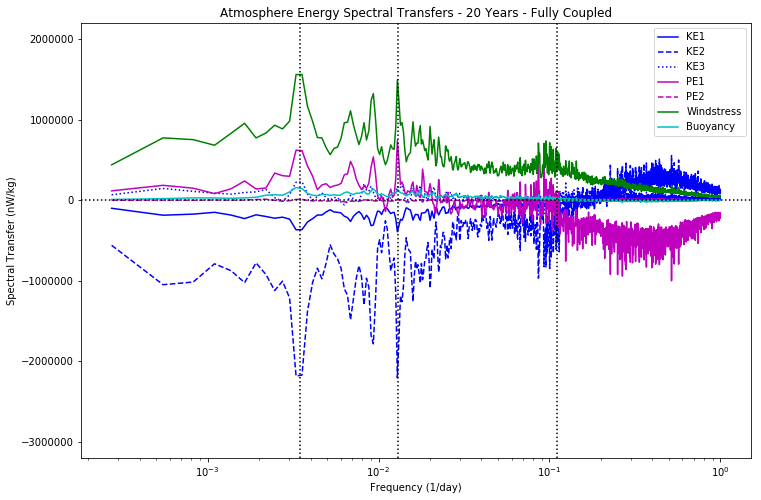

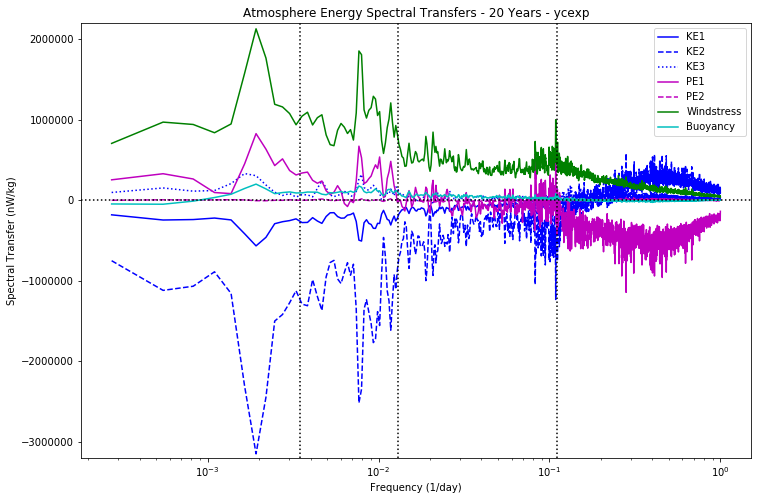

In [54]:
# Sigma for gaussian filter
m = 0.8

ktiso = (2./(365*20))*np.arange(0,np.floor(20*365.0/2)+1)

# fully coupled
plt.figure(figsize=(12,8))
plt.semilogx(ktiso,gaussian_filter(KE1_at*1e9,sigma=m),color='b',label='KE1')
plt.semilogx(ktiso,gaussian_filter(KE2_at*1e9,sigma=m),color='b',LineStyle='dashed',label='KE2')
plt.semilogx(ktiso,gaussian_filter(KE3_at*1e9,sigma=m),color='b',LineStyle='dotted',label='KE3')
plt.semilogx(ktiso,gaussian_filter(PE1_at*1e9,sigma=m),color='m',label='PE1')
plt.semilogx(ktiso,gaussian_filter(PE2_at*1e9,sigma=m),color='m',LineStyle='dashed',label='PE2')
plt.semilogx(ktiso,gaussian_filter(windstress_at*1e9,sigma=m),color='g',label='Windstress')
plt.semilogx(ktiso,gaussian_filter(buoyancy_at*1e9,sigma=m),color='c',label='Buoyancy')

plt.axhline(0,color='k',linestyle='dotted')
plt.axvline((1./9),color='k',linestyle='dotted')
plt.axvline((1./77),color='k',linestyle='dotted')
plt.axvline((1./(290)),color='k',linestyle='dotted')

plt.legend()
plt.ylim((-3200000,2200000))
plt.xlabel('Frequency (1/day)')
plt.ylabel('Spectral Transfer (nW/kg)')
plt.title('Atmosphere Energy Spectral Transfers - 20 Years - Fully Coupled')

# ycexp
plt.figure(figsize=(12,8))
plt.semilogx(ktiso,gaussian_filter(KE1_at_ycexp*1e9,sigma=m),color='b',label='KE1')
plt.semilogx(ktiso,gaussian_filter(KE2_at_ycexp*1e9,sigma=m),color='b',LineStyle='dashed',label='KE2')
plt.semilogx(ktiso,gaussian_filter(KE3_at_ycexp*1e9,sigma=m),color='b',LineStyle='dotted',label='KE3')
plt.semilogx(ktiso,gaussian_filter(PE1_at_ycexp*1e9,sigma=m),color='m',label='PE1')
plt.semilogx(ktiso,gaussian_filter(PE2_at_ycexp*1e9,sigma=m),color='m',LineStyle='dashed',label='PE2')
plt.semilogx(ktiso,gaussian_filter(windstress_at_ycexp*1e9,sigma=m),color='g',label='Windstress')
plt.semilogx(ktiso,gaussian_filter(buoyancy_at_ycexp*1e9,sigma=m),color='c',label='Buoyancy')

plt.axhline(0,color='k',linestyle='dotted')
plt.axvline((1./9),color='k',linestyle='dotted')
plt.axvline((1./77),color='k',linestyle='dotted')
plt.axvline((1./(290)),color='k',linestyle='dotted')

plt.legend()
plt.ylim((-3200000,2200000))
plt.xlabel('Frequency (1/day)')
plt.ylabel('Spectral Transfer (nW/kg)')
plt.title('Atmosphere Energy Spectral Transfers - 20 Years - ycexp')

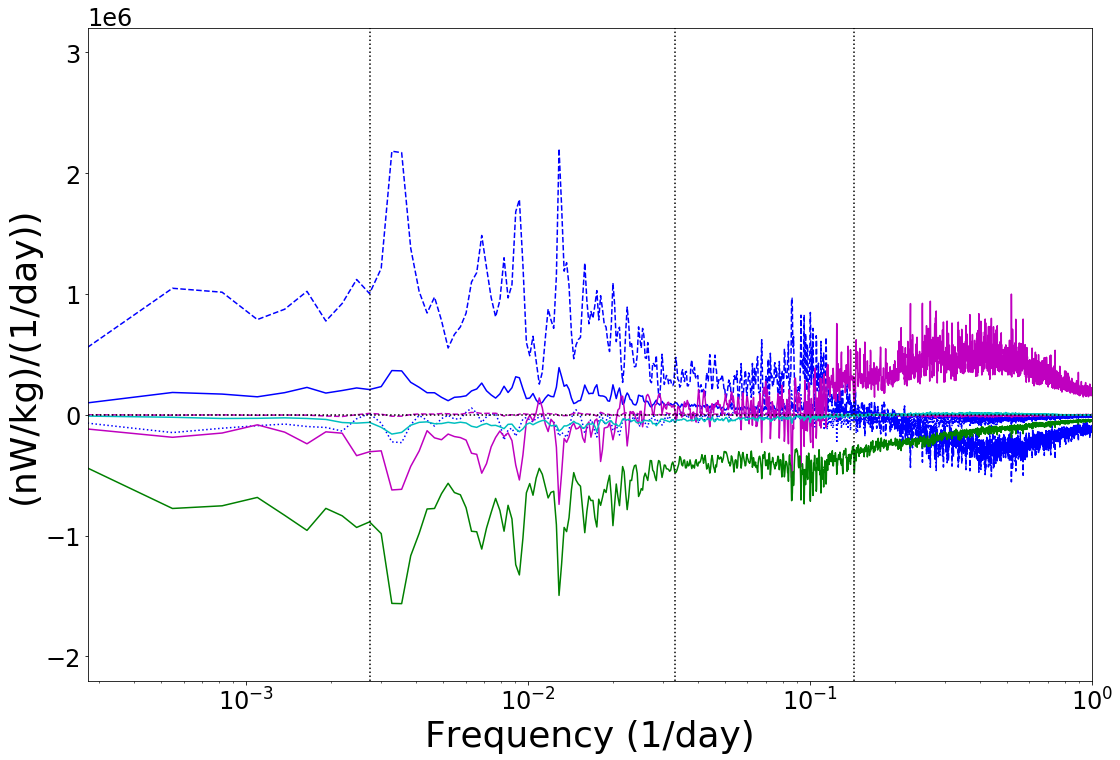

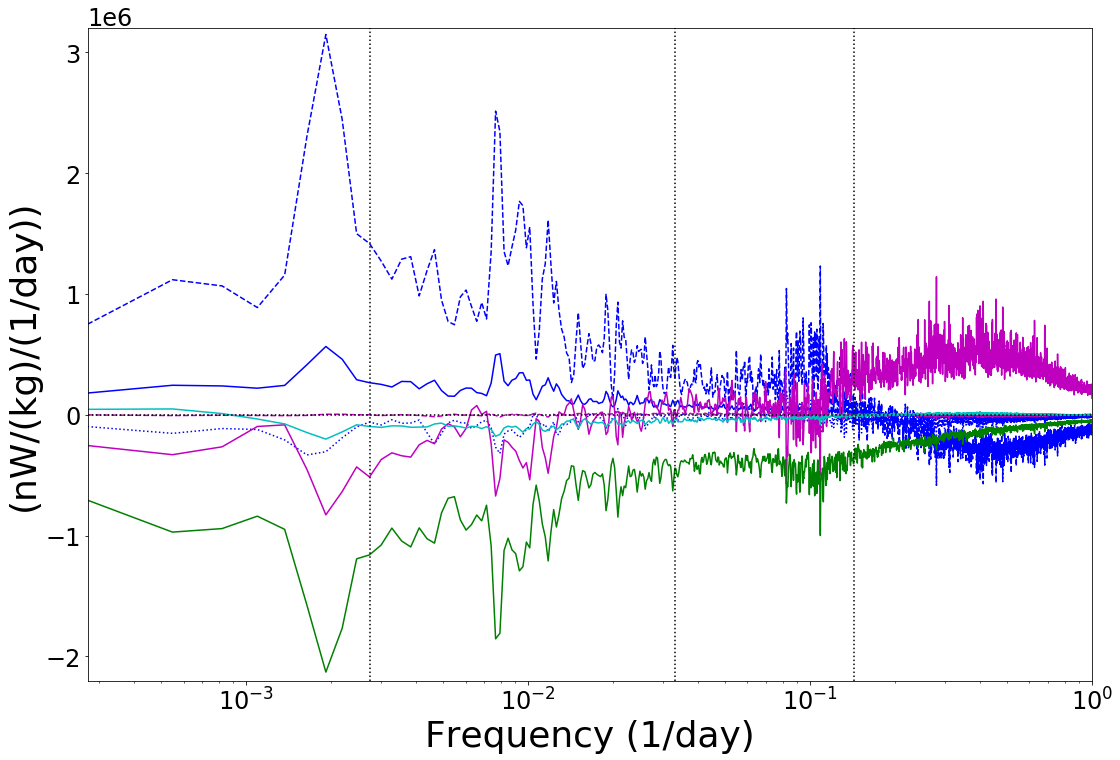

In [89]:
# Sigma for gaussian filter
m = 0.8

ktiso = (2./(365*20))*np.arange(0,np.floor(20*365.0/2)+1)

# Specify smaller font size for screen viewing
font = {'size'   : 24}
matplotlib.rc('font', **font)

# fully coupled
plt.figure(figsize=(18,12))
plt.semilogx(ktiso,gaussian_filter(-KE1_at*1e9,sigma=m),color='b',label='KE1')
plt.semilogx(ktiso,gaussian_filter(-KE2_at*1e9,sigma=m),color='b',LineStyle='dashed',label='KE2')
plt.semilogx(ktiso,gaussian_filter(-KE3_at*1e9,sigma=m),color='b',LineStyle='dotted',label='KE3')
plt.semilogx(ktiso,gaussian_filter(-PE1_at*1e9,sigma=m),color='m',label='PE1')
plt.semilogx(ktiso,gaussian_filter(-PE2_at*1e9,sigma=m),color='m',LineStyle='dashed',label='PE2')
plt.semilogx(ktiso,gaussian_filter(-buoyancy_at*1e9,sigma=m),color='c',label='Buoyancy')
plt.semilogx(ktiso,gaussian_filter(-windstress_at*1e9,sigma=m),color='g',label='Bottom Friction')


plt.axhline(0,color='k',linestyle='dotted')
plt.axvline((1./7),color='k',linestyle='dotted')
plt.axvline((1./30),color='k',linestyle='dotted')
plt.axvline((1./(365)),color='k',linestyle='dotted')

plt.xlim((np.min(ktiso),np.max(ktiso)))
plt.ylim((-2200000,3200000))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Frequency (1/day)',Fontsize=36)
plt.ylabel('(nW/kg)/(1/day))',Fontsize=36)
#plt.title('Atmosphere Energy Spectral Transfers - 20 Years - Fully Coupled')
#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

plt.savefig('Tbudget_at_20yr_040_059_OSM2018.png')

# ycexp
plt.figure(figsize=(18,12))
plt.semilogx(ktiso,gaussian_filter(-KE1_at_ycexp*1e9,sigma=m),color='b',label='KE1')
plt.semilogx(ktiso,gaussian_filter(-KE2_at_ycexp*1e9,sigma=m),color='b',LineStyle='dashed',label='KE2')
plt.semilogx(ktiso,gaussian_filter(-KE3_at_ycexp*1e9,sigma=m),color='b',LineStyle='dotted',label='KE3')
plt.semilogx(ktiso,gaussian_filter(-PE1_at_ycexp*1e9,sigma=m),color='m',label='PE1')
plt.semilogx(ktiso,gaussian_filter(-PE2_at_ycexp*1e9,sigma=m),color='m',LineStyle='dashed',label='PE2')
plt.semilogx(ktiso,gaussian_filter(-buoyancy_at_ycexp*1e9,sigma=m),color='c',label='Buoyancy')
plt.semilogx(ktiso,gaussian_filter(-windstress_at_ycexp*1e9,sigma=m),color='g',label='Friction')


plt.axhline(0,color='k',linestyle='dotted')
plt.axvline((1./7),color='k',linestyle='dotted')
plt.axvline((1./30),color='k',linestyle='dotted')
plt.axvline((1./(365)),color='k',linestyle='dotted')

plt.xlim((np.min(ktiso),np.max(ktiso)))
plt.ylim((-2200000,3200000))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Frequency (1/day)',Fontsize=36)
plt.ylabel('(nW/(kg)/(1/day))',Fontsize=36)
#plt.title('Atmosphere Energy Spectral Transfers - 20 Years - ycexp')
#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

plt.savefig('Tbudget_at_ycexp_20yr_040_059_OSM2018.png')